In [1]:
import pennylane as qml
import numpy as np
import math

Résolution de Sudoku avec l'algorithm de Grover pour n=2

In [49]:
pair_a_verifier = [(0, 1), (0, 2), (1, 3), (2, 3)]

wire_reg = qml.registers({"x" : 4, "c" : 4, "v" : 1})
dev = qml.device("default.qubit")

def XOR(a, b, sortie):
    qml.CNOT(wires=[a, sortie])
    qml.CNOT(wires=[b, sortie])

def sudoku_oracle():
    i = 0
    for pair in pair_a_verifier:
        XOR(pair[0], pair[1], wire_reg["c"][i])
        i += 1

    qml.MultiControlledX(wires=wire_reg["c"] + wire_reg["v"])

    i = 0
    for pair in pair_a_verifier:
        XOR(pair[0], pair[1], wire_reg["c"][i])
        i += 1

def diffuser(nqubits):
    for i in range(nqubits):
        qml.Hadamard(i)
        qml.PauliX(i)

    qml.Hadamard(wires=nqubits - 1)
    qml.MultiControlledX(wires=list(range(nqubits-1)))
    qml.Hadamard(wires=nqubits - 1)

    for i in range(nqubits):
        qml.PauliX(wires=wire_reg["x"][i])
        qml.Hadamard(wires=wire_reg["x"][i])

@qml.qnode(dev)
def circuit():
    # Initialisation
    for i in range(4):
        qml.Hadamard(wires=wire_reg["x"][i])

    qml.PauliX(wires=wire_reg["v"])
    qml.Hadamard(wires=wire_reg["v"])

    # Première itération de Grover 
    sudoku_oracle()
    diffuser(4)

    # Deuxième itération de Grover
    sudoku_oracle()
    diffuser(4)

    return qml.probs(wires=wire_reg["x"])

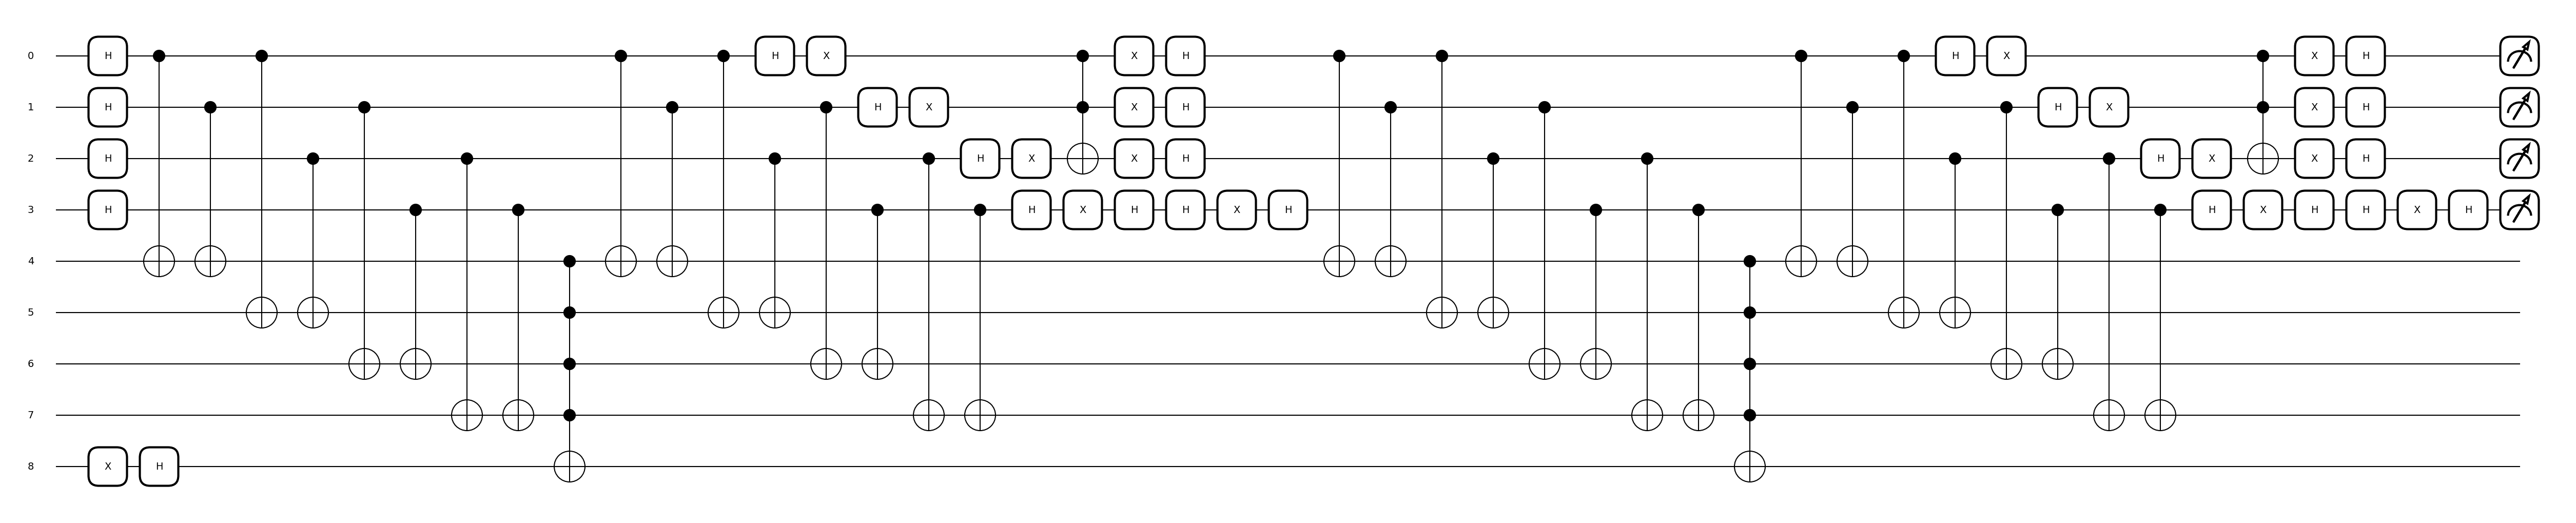

In [50]:
fig, ax = qml.draw_mpl(circuit)()

In [46]:
circuit()

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])